# Retirement Calculator


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

# Assumptions
#balance_start = 70000  # starting balance in dollars
#salary_start = 150000  # gross salary in dollars
#salary_retired = 80000 # yearly withdrawal AFTER Social Security, in CURRENT dollars. Assume total withdrawal of 77-80% of current salary
#salary_growth = 0.025  # percentage annual salary raise    
#inflation = 0.03      # percentage inflation     
#savings_rate = 0.23    # percentage of yearly gross salary going to savings    
#age_start = 41         # in years 
#age_retirement = 67    # in years
#annual_return = 0.06   # percentage annual return on investment

class retirement_plan:
    """
    A retirement plan. 
    """

    def __init__(self, balance_start = 70000, salary_start = 150000, salary_retired = 80000, salary_growth = 0.025, 
                 inflation = 0.03, annual_return = 0.06, savings_rate = 0.23, age_start = 41, age_retirement = 67, mute=False):
        """
        Initializes the retirement plan with the following parameters:
        
        balance_start: starting balance in dollars (default = $70,000)
        salary_start: gross salary in dollars (default = $150,000)
        salary_retired: yearly withdrawal AFTER Social Security, in current dollars (default = $80,000)
        salary_growth: percentage annual salary raise (default = 0.025)     
        inflation: percentage inflation (default = 0.03)     
        savings_rate: percentage of yearly gross salary going to savings (default =0.23)     
        age_start: starting age in years (default = 41) 
        age_retirement: age starting retirement in years (default = 67)
        annual_return: percentage annual return on investments (default = 0.06)
        mute: switch on (True) for switching off output printing (default = False (off))
        """
        self.balance_start = balance_start
        self.salary_start = salary_start
        self.salary_retired = salary_retired
        self.salary_growth = salary_growth
        self.inflation = inflation
        self.annual_return = annual_return
        self.savings_rate = savings_rate
        self.age_start = age_start
        self.age_retirement = age_retirement
        self.mute = mute
        
    def calculate(self): 
        self.age_list = []
        self.balance_list = []
        self.salary_list = []
        age = self.age_start
        balance = self.balance_start
        salary = self.salary_start
        salary_retired = self.salary_retired
        if not self.mute:
            print("age", "balance", "salary", "salary_retired")

        # Accumulation Phase:
        while age < self.age_retirement:
            # Values at the start of the year
            if not self.mute:
                print(age, round(balance), round(salary), round(salary_retired))
            self.age_list.append(age)
            self.balance_list.append(round(balance))
            self.salary_list.append(round(salary))

            #Yearly savings and return on investment, compounding monthly
            yearly_savings = self.savings_rate*salary
            for month in range(12):
                balance += yearly_savings/12.
                balance *= (1+self.annual_return)**(1./12)
        
            # Salary raise and inflation correction at the end of the year
            salary += salary*self.salary_growth
            salary_retired += salary_retired*self.inflation 

            # Turn older at the end of the year
            age += 1

        # Retirement Phase:
        while (balance > 0) & (age < 121):
            # Values at the start of the year
            salary = round(salary_retired)
            balance -= salary      
            if not self.mute:
                print(age, round(balance), round(salary), round(salary_retired))
            
            self.age_list.append(age)                  
            self.balance_list.append(round(balance))
            self.salary_list.append(salary)
    
            #Yearly return on investment, compounding monthly
            for month in range(12):
                balance *= (1+self.annual_return)**(1./12)
 
            # Salary inflation correction at the end of the year
            salary_retired += salary_retired*self.inflation

            # Turn older at the end of the year
            age += 1    
            
            
        self.age_zero = self.age_list[-1]
    
    def summary(self):
        age_index = self.age_list.index(self.age_retirement)
        print("Balance at retirement: ${0:.0f}".format(self.balance_list[age_index]))
        print("Salary at retirement: ${0:.0f}".format(self.salary_list[age_index]))
        print("Starting withdrawal is {0:.1f}% of savings".format(100.*self.salary_list[age_index]/self.balance_list[age_index])) 
        if self.age_zero == 120:
            print("You'll never run out of money!")
        else:
            print("You'll run out of money when you are:", self.age_zero)
    
    def plot(self):
        age_index = self.age_list.index(self.age_retirement)
        fig, (ax1, ax2) = plt.subplots(2, sharex=False, figsize=(12,12))
        ax1.plot(self.age_list,self.balance_list)
        ax2.plot(self.age_list,self.salary_list)
        bottom2, top2 = ax2.get_ylim() # return the current ylim, NOT including margins!
        ax1.set_title('Savings vs Age')
        ax2.set_title('Income vs Age')
        ax1.set_ylabel('Total Savings')
        ax2.set_ylabel('Income')
        fmt = '${x:,.0f}'
        tick = mtick.StrMethodFormatter(fmt)
        ax1.yaxis.set_major_formatter(tick) 
        ax2.yaxis.set_major_formatter(tick) 
        ax1.grid(True)
        ax2.grid(True)
        plt.xlabel('Age')
        for ax in [ax1, ax2]:
            ax.axvline(x=self.age_retirement, linestyle = '--', color='blue')
            ax.axvline(x=self.age_zero, linestyle = '--', color='red')
        ax1.text(self.age_retirement, self.balance_list[age_index], 'Retirement at '+str(self.age_retirement),  horizontalalignment='center',
            fontsize=12,bbox=dict(boxstyle = "square",
                  facecolor = "white"))
        ax1.text(self.age_zero, 0, 'Out of money at '+str(self.age_zero),  horizontalalignment='center',
            fontsize=12,bbox=dict(boxstyle = "square",
                  facecolor = "white"))
        plt.savefig('retirement_plan.png', bbox_inches = 'tight')
 

In [2]:
plan = retirement_plan(savings_rate = 0.23, salary_start = 100000, salary_retired=77000, salary_growth=0.025, inflation=0.025, annual_return=0.06)
#plan = retirement_plan()
plan.calculate()

age balance salary salary_retired
41 70000 100000 77000
42 97941 102500 78925
43 128152 105062 80898
44 160783 107689 82921
45 195997 110381 84994
46 233962 113141 87118
47 274860 115969 89296
48 318884 118869 91529
49 366238 121840 93817
50 417138 124886 96162
51 471815 128008 98567
52 530514 131209 101031
53 593495 134489 103556
54 661034 137851 106145
55 733423 141297 108799
56 810973 144830 111519
57 894015 148451 114307
58 982900 152162 117165
59 1077998 155966 120094
60 1179706 159865 123096
61 1288441 163862 126173
62 1404650 167958 129328
63 1528804 172157 132561
64 1661404 176461 135875
65 1802981 180873 139272
66 1954101 185394 142754
67 1969038 146323 146323
68 1937199 149981 149981
69 1899701 153730 153730
70 1856110 157573 157573
71 1805964 161513 161513
72 1748771 165551 165551
73 1684008 169689 169689
74 1611116 173932 173932
75 1529503 178280 178280
76 1438537 182737 182737
77 1337544 187305 187305
78 1225808 191988 191988
79 1102569 196788 196788
80 967016 201707 20170

Balance at retirement: $1969038
Salary at retirement: $146323
Starting withdrawal is 7.4% of savings
You'll run out of money when you are: 86


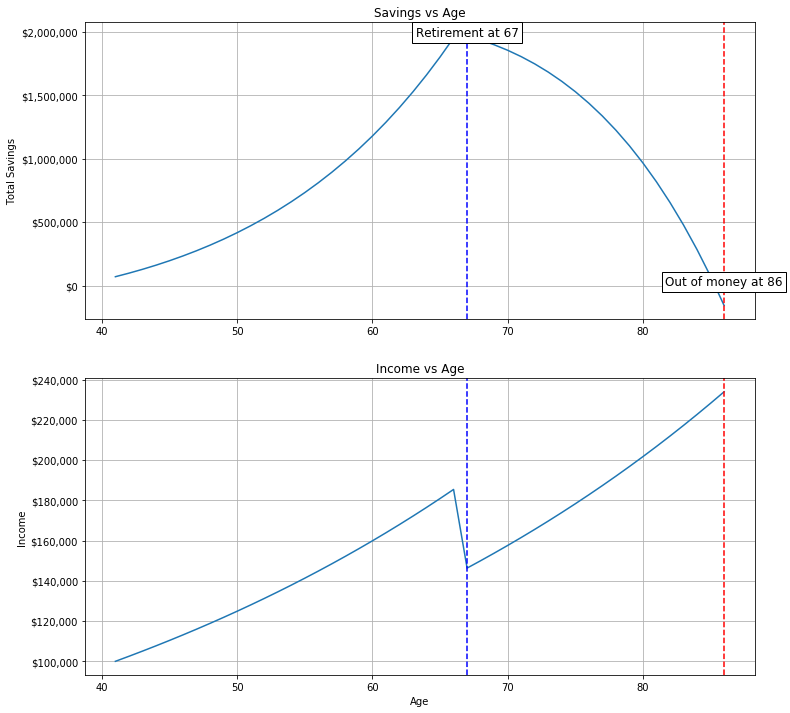

In [3]:
plan.summary()
plan.plot()

### Model simulations

Now that it seems to work for one model, make a grid of different saving rates and annual returns, and plot for each combination the age at which you run out of money.

First try it in one dimension with just variable saving rates:

0.0	69
0.01	69
0.02	70
0.03	70
0.04	71
0.05	72
0.06	72
0.07	73
0.08	74
0.09	74
0.1	75
0.11	76
0.12	76
0.13	77
0.14	78
0.15	79
0.16	80
0.17	80
0.18	81
0.19	82
0.2	83
0.21	84
0.22	85
0.23	86
0.24	87
0.25	88
0.26	89
0.27	90
0.28	91
0.29	93
0.3	94
0.31	95
0.32	97
0.33	98
0.34	100
0.35	101
0.36	103
0.37	105
0.38	107
0.39	109
0.4	111
0.41	114
0.42	116
0.43	119
0.44	120
0.45	120
0.46	120
0.47	120
0.48	120
0.49	120
0.5	120


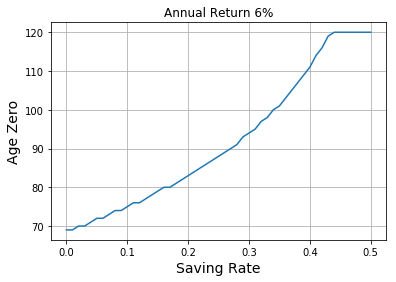

In [4]:
saving_rates = []
ages = []

for sav_rate in np.arange(0.0, 0.51,0.01):
    plan = retirement_plan(savings_rate = sav_rate, salary_start = 100000, salary_retired=77000, salary_growth=0.025, inflation=0.025, annual_return=0.06, mute=True)
    plan.calculate()
    saving_rates.append(sav_rate)
    ages.append(plan.age_zero)
    
for x, y in zip(saving_rates, ages):
    print(x, y, sep='\t')
    
plt.figure(figsize = (6,4))
plt.plot(saving_rates,ages)
plt.xlabel("Saving Rate", fontsize = 14)
plt.ylabel('Age Zero', fontsize = 14)
plt.title('Annual Return 6%')
plt.grid(True)

0.0	72
0.01	73
0.02	74
0.03	76
0.04	78
0.05	81
0.06	86
0.07	97
0.08	120
0.09	120
0.1	120
0.11	120


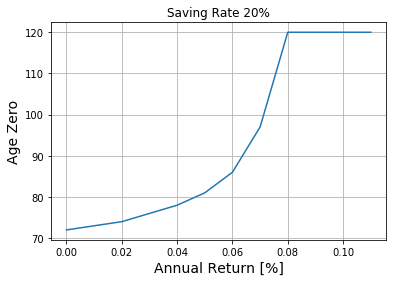

In [5]:
annual_returns = []
ages = []

for annual_return in np.arange(0.0, 0.12,0.01):
    plan = retirement_plan(savings_rate = 0.2, salary_start = 100000, salary_retired=77000, salary_growth=0.02, inflation=0.02, annual_return=annual_return, mute=True)
    plan.calculate()
    annual_returns.append(annual_return)
    ages.append(plan.age_zero)

for x, y in zip(annual_returns, ages):
    print(x, y, sep='\t')
    
plt.figure(figsize = (6,4))
plt.plot(annual_returns,ages)
plt.xlabel("Annual Return [%]", fontsize = 14)
plt.ylabel('Age Zero', fontsize = 14)
plt.title('Saving Rate 20%')
plt.grid(True)

### Now make it 2-D

In [6]:
test = np.arange(0.0, 0.13,0.01)
for i in range(len(test)):
    print(i, test[i])
print(len(test))
print(test[12])
for j in range(10):
    print(j)

0 0.0
1 0.01
2 0.02
3 0.03
4 0.04
5 0.05
6 0.06
7 0.07
8 0.08
9 0.09
10 0.1
11 0.11
12 0.12
13
0.12
0
1
2
3
4
5
6
7
8
9


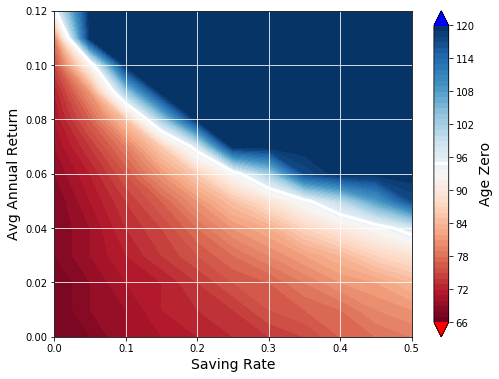

In [58]:
annual_returns = np.arange(0.0, 0.13,0.01)
saving_rates = np.arange(0.0, 0.55,0.05)
age_levels = np.arange(66,121,1)

ages = np.zeros((len(annual_returns), len(saving_rates)))
for i in range(len(saving_rates)):
    sav_rate = saving_rates[i]
    for j in range(len(annual_returns)):
        annual_return = annual_returns[j]
        plan = retirement_plan(savings_rate = sav_rate, salary_start = 100000, salary_retired=77000, salary_growth=0.02, inflation=0.02, annual_return=annual_return, mute=True)
        plan.calculate()
        ages[j,i] = plan.age_zero
    
fig, ax = plt.subplots(figsize = (8,6)) #
CS = ax.contourf(saving_rates, annual_returns, ages, age_levels,
                extend='both', cmap = 'RdBu') #'viridis' 'RdBu'
CS.cmap.set_under('red')
CS.cmap.set_over('blue')
ax.set_xlabel('Saving Rate', fontsize = 14)
ax.set_ylabel('Avg Annual Return', fontsize = 14)
#CS2 = ax.contour(saving_rates, annual_returns, ages, age_levels,
#                 colors=('w',),
#                 linewidths = (1,))
CS3 = ax.contour(saving_rates, annual_returns, ages, [95],
                 colors=('w',),
                 linewidths = (3))
ax.grid(True, color='w')
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('Age Zero', fontsize = 14)
cbar.add_lines(CS3)

plt.savefig('age_vs_return_and_rate.png', bbox_inches = 'tight')
  
         

In [79]:
np.random.randn(0,2)

array([], shape=(0, 2), dtype=float64)

In [ ]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'});

In [20]:
plt.cm.

SyntaxError: invalid syntax (<ipython-input-20-5a838362d4ce>, line 1)